In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# pip install scikit-plot or conda install scikit-plot
import scikitplot as skplt

In [2]:
# load data and print data
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
data = StandardScaler().fit_transform(
    iris.data
)  # standardize the data (mean=0, variance=1)
X = pd.DataFrame(data=data, columns=iris.feature_names)
Y = iris.target
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [3]:
from sklearn.neighbors import KNeighborsClassifier


def knn_accuracy(k, x_train, x_test, y_train, y_test):
    """
    Helper method, creates the knn classifier, trains it using our test data and return its accuracy
    """
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)  # train model
    y_pred = clf.predict(x_test)  # y  pred
    y_score = clf.predict_proba(x_test)
    return clf.score(x_test, y_test), y_pred, y_score

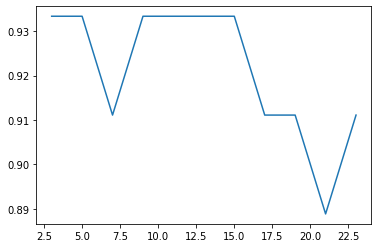

,accuracy
3,0.933333
5,0.933333
7,0.911111
9,0.933333
11,0.933333
13,0.933333
15,0.933333
17,0.911111
19,0.911111
21,0.888889


In [22]:
# calculate the model accuracy for different k_neighbors, table and plot the model accuracy
k_range = range(3, 25, 2)  # each odd number between 1 and 15
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
accuracies = [knn_accuracy(k, x_train, x_test, y_train, y_test)[0] for k in k_range]
acc_df = pd.DataFrame(accuracies, columns=["accuracy"], index=k_range)
plt.plot(k_range, accuracies, label="Test Accuracy")
plt.show()
acc_df

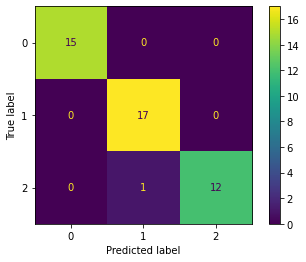

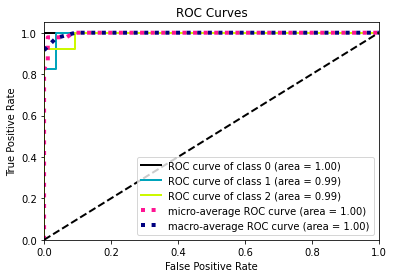

In [5]:
# plot Confusion Matrix & ROC
from sklearn.metrics import ConfusionMatrixDisplay


_, y_pred, y_score = knn_accuracy(5, x_train, x_test, y_train, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_score)
plt.show()

SVM Classifier 

In [9]:
from sklearn import svm


def svm_accuracy(kernel, C, x_train, x_test, y_train, y_test):
    """
    Helper method, creates the svm classifier, trains it using our test data and return its accuracy
    """
    clf = svm.SVC(kernel=kernel, C=C, probability=True)
    clf.fit(x_train, y_train)  # train model
    y_score = clf.predict_proba(x_test)
    y_pred = clf.predict(x_test)  # y  pred
    return clf.score(x_test, y_test), y_pred, y_score

In [20]:
import itertools

kernels = ["linear", "poly", "rbf", "sigmoid"]
C = [0.001, 0.01, 1, 10, 100, 1000]
pairs = list(itertools.product(kernels, C))  # all possible options

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

accuracies = [svm_accuracy(k, c, x_train, x_test, y_train, y_test)[0] for k, c in pairs]
acc_df = pd.DataFrame(pairs, columns=["Kernels", "Cost"])
acc_df["Accuracy"] = accuracies


plt.show()
acc_df

,Kernels,Cost,Accuracy
0,linear,0.001,0.266667
1,linear,0.010,0.888889
2,linear,1.000,0.977778
3,linear,10.000,0.977778
4,linear,100.000,0.977778
5,linear,1000.000,1.000000
6,poly,0.001,0.266667
7,poly,0.010,0.600000
8,poly,1.000,0.955556
9,poly,10.000,0.977778


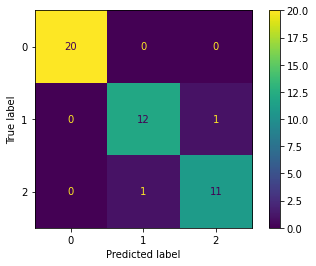

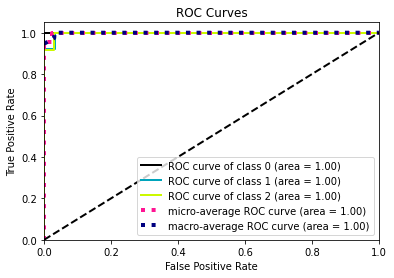

In [21]:
_, y_pred, y_score = svm_accuracy("rbf", 1, x_train, x_test, y_train, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_score)
plt.show()